In [2]:
import os
os.chdir('../..')

In [3]:
from classes.helpers import *
import numpy as np
import json
import pandas as pd
from datetime import datetime

import ast

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

data_folder = '../data/'

# For the Python notebook
%matplotlib inline
%reload_ext autoreload
%autoreload 2

min_nbr_rats = 5

colors = {'ba': (232/255,164/255,29/255), 'rb': (0/255,152/255,205/255)}
labels = {'ba': 'BeerAdvocate', 'rb': 'RateBeer'}

notext = {'ba': 'nan', 'rb': ''}

data_folder = '../data/'
save_folder = '../figures/all/4-herding/'

In [4]:
df = pd.read_csv(data_folder + 'tmp/time_series_{}.csv'.format(min_nbr_rats), header=[0,1])

# Transform strings into arrays
for i in df.index:
    for key1 in ['ba', 'rb']:
        for key2 in ['dates', 'ratings', 'z_scores']:
            arr = ast.literal_eval(df.loc[i][key1][key2])
            df.set_value(i, (key1, key2), arr)

In [5]:
with open(data_folder + 'tmp/global_averages.json') as file:
    global_avg = json.load(file)

diffs = {'ba': [], 'rb': []}
for i in df.index:
    row = df.loc[i]
    for key in ['rb', 'ba']:
        diffs[key].append(row[key]['z_scores'][0] - global_avg[key]['z_score'])
        
thresholds = {}

for key in ['ba', 'rb']:
    thresholds[key] = {}
    thresholds[key]['low'] = np.percentile(diffs[key], 15)
    thresholds[key]['high'] = np.percentile(diffs[key], 85)

In [6]:
for key in ['ba', 'rb']:
    tmp = []
    nbr_rats = []
    
    for i in df.index:      
        if diffs[key][i] > thresholds[key]['high']:
            tmp.append('H')
        elif diffs[key][i] >= thresholds[key]['low']:
            tmp.append('M')
        else:
            tmp.append('L')
            
        nbr_rats.append(len(df.loc[i][key]['ratings']))

    df.loc[:, (key, 'class')] = tmp
    df.loc[:, (key, 'nbr_ratings')] = nbr_rats

In [7]:
subdf = df[((df['ba']['class'] == 'H') & (df['rb']['class'] == 'L')) | 
           ((df['ba']['class'] == 'L') & (df['rb']['class'] == 'H'))]
subdf.index = range(len(subdf))

In [8]:
diff = []
for i in subdf.index:
    row = subdf.loc[i]
    diff.append(np.abs(row['ba']['avg_z_scores']-row['rb']['avg_z_scores']))
    

In [9]:
idx = np.argsort(diff)[::-1]

10
22
64


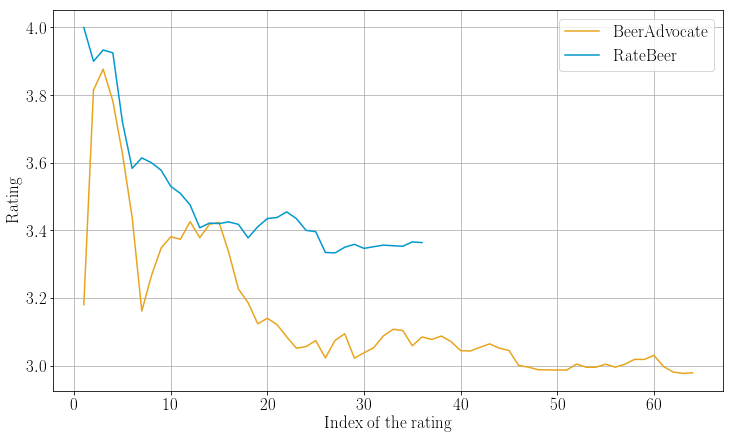

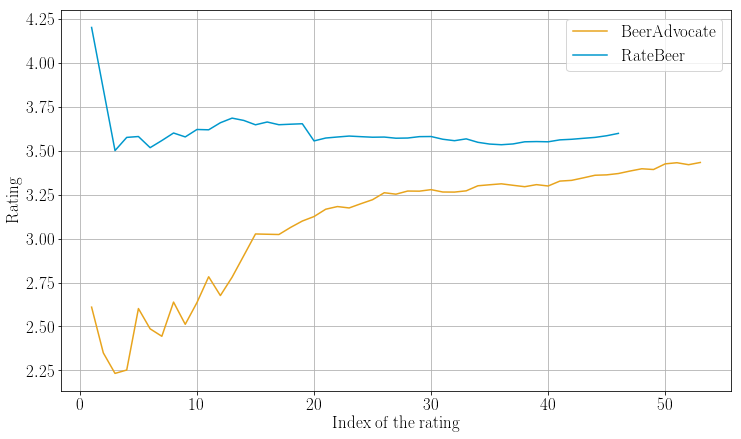

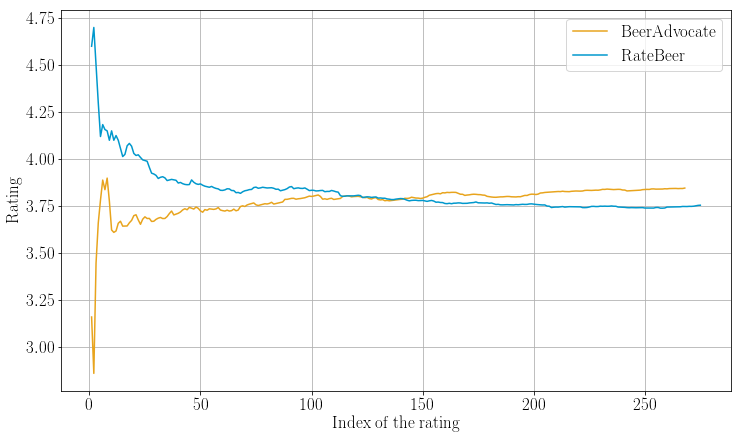

In [11]:
for pos in [10, 22, 64]:
    
    row = subdf.loc[idx[pos]]
            
    print(pos)

    plt.figure(figsize=(12,7))
    plt.rc('font', family='serif')
    plt.rc('font', size=17)

    for key in ['ba', 'rb']:

        rats = row[key]['ratings']

        rmean = np.cumsum(rats)/np.array(range(1, len(rats)+1))

        plt.plot(list(range(1, len(rmean)+1)), rmean, color=colors[key], label=labels[key])

    plt.ylabel('Rating')
    plt.xlabel('Index of the rating')
    plt.legend()
    plt.grid()
    #plt.savefig(save_folder + 'timeseries_ratings_example.pdf', bbox_inches='tight')

10
22
64


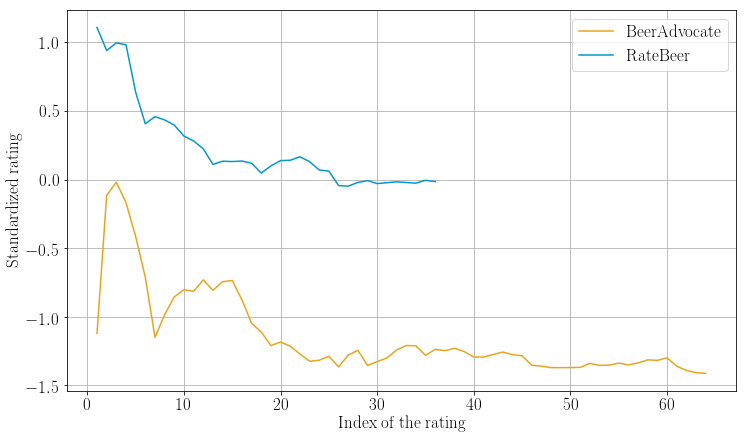

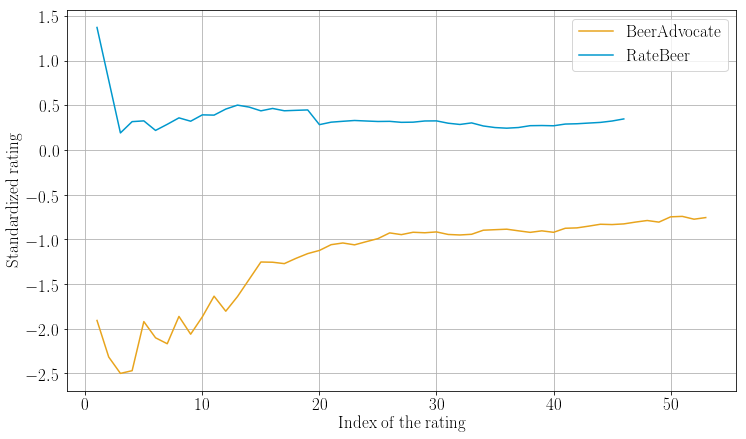

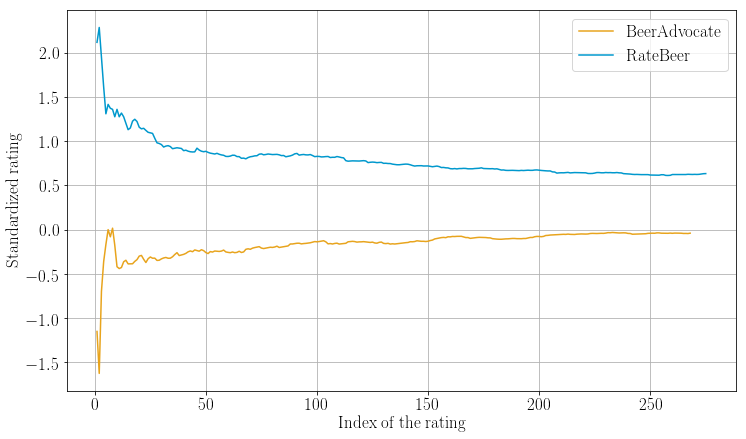

In [12]:
for pos in [10, 22, 64]:
    row = subdf.loc[idx[pos]]    
    print(pos)

    plt.figure(figsize=(12,7))
    plt.rc('font', family='serif')
    plt.rc('font', size=17)

    for key in ['ba', 'rb']:

        rats = row[key]['z_scores']

        rmean = np.cumsum(rats)/np.array(range(1, len(rats)+1))

        plt.plot(list(range(1, len(rmean)+1)), rmean, color=colors[key], label=labels[key])

    plt.ylabel('Standardized rating')
    plt.xlabel('Index of the rating')
    plt.legend()
    plt.grid()
    #plt.savefig(save_folder + 'timeseries_zscore_example.pdf', bbox_inches='tight')

We take the good example as the number 64!

In [13]:
subdf.loc[idx[64]]

ba  avg_ratings                                               3.84575
    avg_z_scores                                           -0.0399921
    beer_id                                                     72762
    dates           [1315044000, 1315044000, 1315130400, 131513040...
    ratings         [3.16, 2.56, 4.62, 4.3, 4.27, 4.42, 3.53, 4.33...
    z_scores        [-1.152624051555878, -2.102113306511666, 1.157...
rb  avg_ratings                                               3.75455
    avg_z_scores                                             0.634353
    beer_id                                                    151736
    dates           [1314439200, 1314871200, 1314957600, 131495760...
    ratings         [4.6, 4.8, 4.1, 3.7, 3.4, 4.5, 4.0, 4.1, 3.7, ...
    z_scores        [2.1200172160302655, 2.4570576186449626, 1.277...
ba  class                                                           L
    nbr_ratings                                                   268
rb  class           

In [14]:
subdf.loc[idx[22]]

ba  avg_ratings                                               3.43245
    avg_z_scores                                            -0.755575
    beer_id                                                     78599
    dates           [1329562800, 1329735600, 1329822000, 133025400...
    ratings         [2.61, 2.09, 2.0, 2.31, 4.0, 1.91, 2.19, 4.0, ...
    z_scores        [-1.908130538162183, -2.7267411652641917, -2.8...
rb  avg_ratings                                               3.59783
    avg_z_scores                                             0.349561
    beer_id                                                    166120
    dates           [1329217200, 1329390000, 1329735600, 133008120...
    ratings         [4.2, 3.5, 2.8, 3.8, 3.6, 3.2, 3.8, 3.9, 3.4, ...
    z_scores        [1.3741954768900506, 0.19266698795641604, -0.9...
ba  class                                                           L
    nbr_ratings                                                    53
rb  class           

22


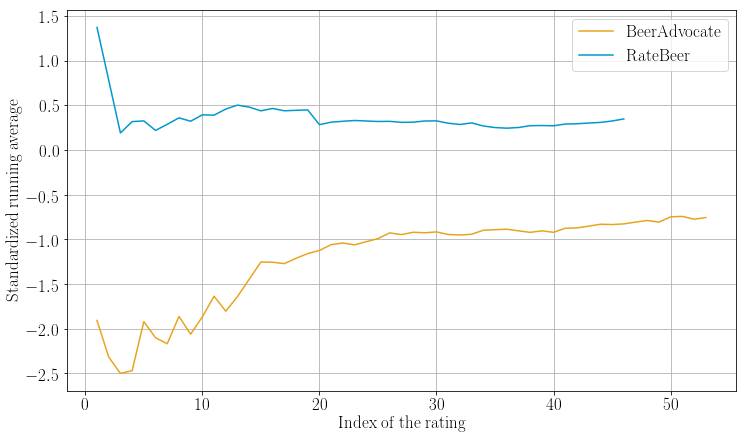

In [14]:
for pos in [22]:
    row = subdf.loc[idx[pos]]    
    print(pos)

    plt.figure(figsize=(12,7))
    plt.rc('font', family='serif')
    plt.rc('font', size=17)

    for key in ['ba', 'rb']:

        rats = row[key]['z_scores']

        rmean = np.cumsum(rats)/np.array(range(1, len(rats)+1))

        plt.plot(list(range(1, len(rmean)+1)), rmean, color=colors[key], label=labels[key])

    plt.ylabel('Standardized running average')
    plt.xlabel('Index of the rating')
    plt.legend()
    plt.grid()
    plt.savefig(save_folder + 'timeseries_avg_zscore_example.pdf', bbox_inches='tight')

22


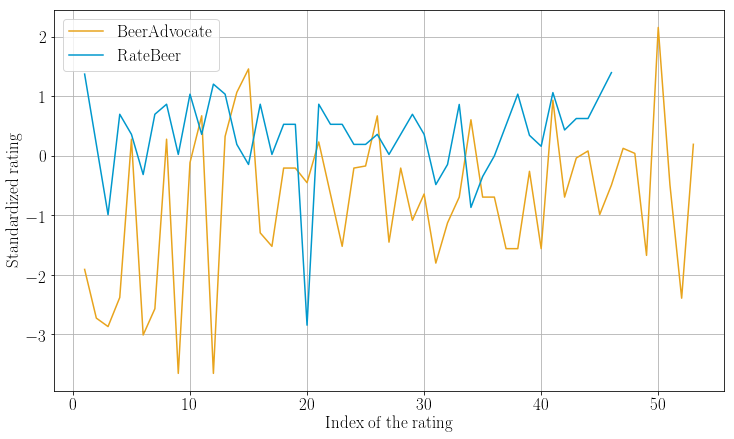

In [13]:
for pos in [22]:
    row = subdf.loc[idx[pos]]    
    print(pos)

    plt.figure(figsize=(12,7))
    plt.rc('font', family='serif')
    plt.rc('font', size=17)

    for key in ['ba', 'rb']:

        rats = row[key]['z_scores']

        rmean = np.cumsum(rats)/np.array(range(1, len(rats)+1))

        plt.plot(list(range(1, len(rmean)+1)), rats, color=colors[key], label=labels[key])

    plt.ylabel('Standardized rating')
    plt.xlabel('Index of the rating')
    plt.legend()
    plt.grid()
    plt.savefig(save_folder + 'timeseries_zscore_example.pdf', bbox_inches='tight')